### Problem 7: Course Schedule Problem

Integer n represents number of courses, and an array of prereqs where prereq[i] = [a,b] means that one has to take course b before course a. Determine if its possible to finish all courses.

### Understanding Notes:

- Check if there is circular dependencies, which means one cannot complete hte course

  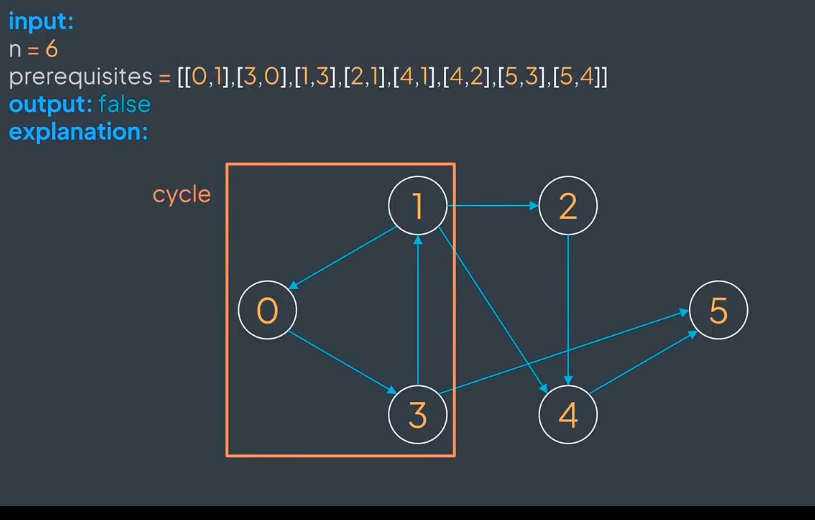 

- Following prereqs work

  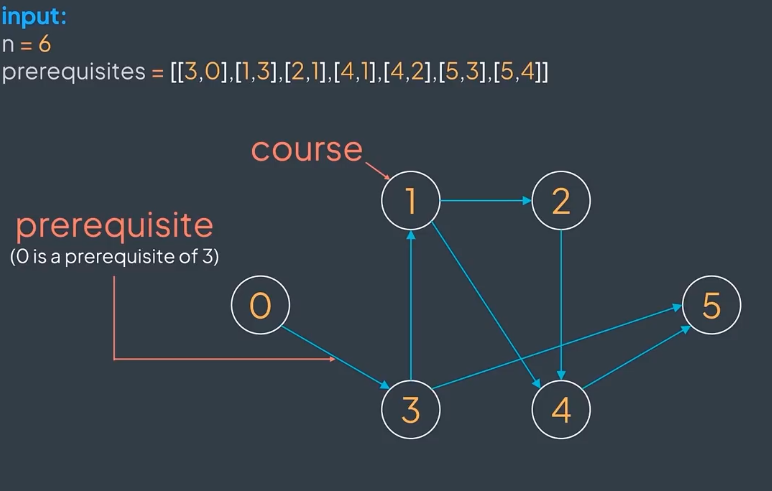


### Implementation Challenges

Ch_1: Trying to visualise the links and the nodes will lead to the graph based solution. 
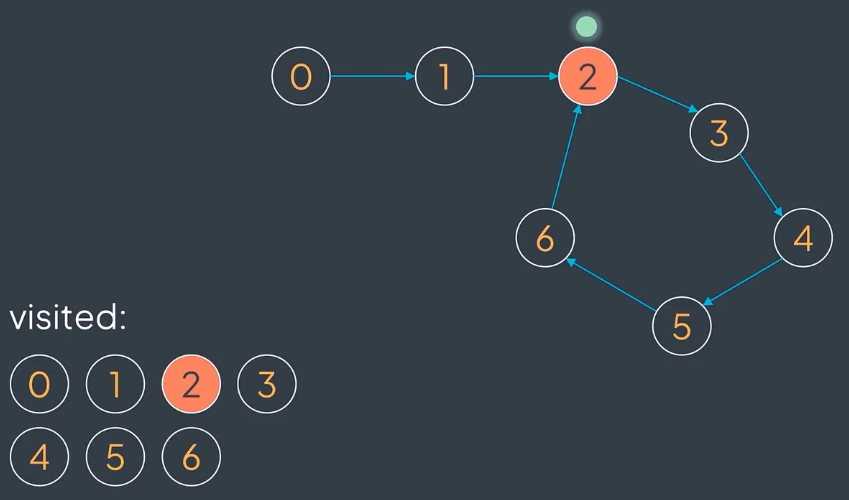


### Ideas / Solutions:

Step 1: Linked list can be used for finding the cyclic nature in directed graphs as shown above

Step 2: Using Topological sort to come up "not unique" but valid array of elements that respect the pre-reqs. Each element has its pre-reqs behind it

TIme complexity of the graph is T(v,e) = O(|v| + |e|) # vertices and edges

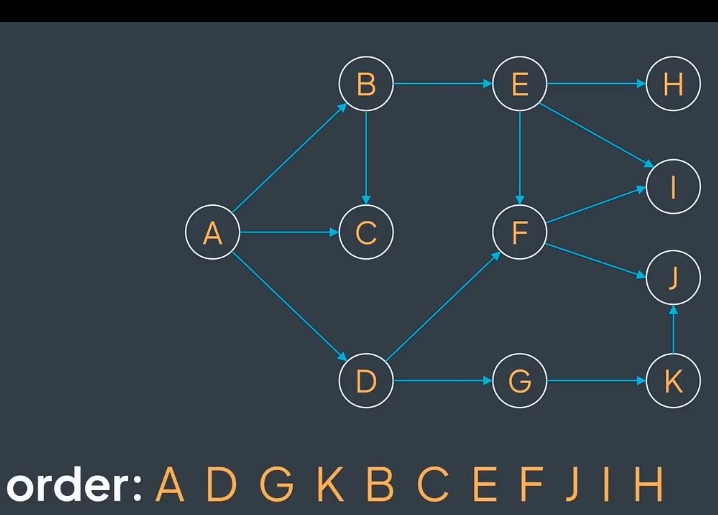

### Where can be used in real world?

The course schedule problem, which involves scheduling courses, classes, or events in an efficient and conflict-free manner, has several real-world applications in various domains. Here are some examples:

Academic Institutions:

University Course Scheduling: Academic institutions must create schedules for courses, lectures, labs, and exams to accommodate students' academic requirements and faculty availability.
School Timetables: Primary and secondary schools need to schedule classes, extracurricular activities, and exams while avoiding conflicts.

Training and Workshops:

Corporate Training: Companies organize training sessions and workshops for employees, and efficient scheduling ensures minimal disruption to regular work.
Professional Development: Organizations offer courses and seminars to professionals, and scheduling avoids conflicts with their work schedules.

Conferences and Events:

Conference Scheduling: Organizing conferences with multiple sessions, speakers, and workshops requires careful scheduling to prevent overlaps.
Event Management: Scheduling events, exhibitions, and performances at venues such as convention centers and theaters ensures smooth operations.

Healthcare and Medical Services:

Medical Appointments: Healthcare facilities schedule patient appointments, surgeries, and tests while accommodating doctors' availability and avoiding conflicts.
Emergency Room Staffing: Hospitals plan staff shifts and ensure adequate coverage in emergency rooms.

Transportation and Logistics:

Public Transit Scheduling: Transit agencies create schedules for buses, trains, and subways to provide reliable and efficient transportation services.
Airline Scheduling: Airlines schedule flights, crew shifts, and maintenance to optimize route networks and minimize delays.
Manufacturing and Production:

Production Scheduling: Manufacturing companies plan production schedules for machinery, assembly lines, and workers to meet production targets.
Supply Chain Management: Efficient scheduling helps coordinate the movement of goods, inventory management, and order processing.
Sports and Athletics:

Sports League Scheduling: Organizing sports leagues, tournaments, and matches involves scheduling games, venues, and referees to avoid conflicts.
Fitness Class Scheduling: Gyms and fitness centers schedule classes, trainers, and equipment usage for members.

Retail and Customer Service:

Store Employee Scheduling: Retail stores plan employee shifts and schedules to ensure sufficient staffing during peak hours.

Customer Service Centers: Call centers schedule customer support agents to handle customer inquiries and requests efficiently.
Information Technology:

Data Center Operations: IT organizations schedule maintenance, updates, and backups of data centers to minimize downtime.

Software Development: Agile teams schedule sprints, meetings, and releases to manage software development projects effectively.

In each of these contexts, solving the course schedule problem is essential for optimizing resource allocation, minimizing conflicts, improving efficiency, and ensuring a seamless experience for stakeholders and participants.

### Extraction of Pseudo Code

1. DFS function:

    inputs: graph, vertex, order are lists 

    inputs: path, visited are sets

    a. vertex is added to path set

    b. looping over the graph[vertex] as neighbour, to look at first depth of the graph tree

        i. if neighbour in path, return false

        ii.  


In [1]:
# We will implement using Topological Sort, will be using the Depth first search

def dfs(graph, vertex, path, order, visited):
    path.add(vertex)
    for neighbor in graph[vertex]:
        if neighbor in path:
            return False
        if neighbor not in visited: #This condition will allow to break out of the recursion
            visited.add(neighbor)
            if not dfs(graph, neighbor,path,order,visited):
                return False
    path.remove(vertex) #path is provided as parameter to function
    order.append(path.pop()) #order is provided as parameter to function
    return True

def top_sort(graph):
    """The vertices are sorted using the dfs(), so 
    the dfs() has to be written first."""
    visited = set() #Its a set!!
    path = []
    order = []
    for vertex in graph:
        if vertex not in visited:
            visited.add(vertex)
            dfs(graph,vertex,path,order, visited)
    return order[::-1] # returns the list in reverse order

In [6]:
#build the adjacency list

def course_schedule(n, prereq):
    graph = [[] for i in range(n)] # this is the graph... 
    
    for pre in prereq:
        graph[pre[1]].append(pre[0])
    print(graph) 
    visited = set()
    path = set()
    order = []

    for course in range(n):
        if course not in visited:
            visited.add(course)
            if not dfs(graph, course, path, order, visited):
                return False

In [7]:
pre_reqs = [[0,1],[3,0],[1,3],[2,1],[4,1],[4,2],[5,3],[5,4]]

course_schedule(8, prereq=pre_reqs)

[[3], [0, 2, 4], [4], [1, 5], [5], [], [], []]


False

In [9]:
pre_reqs[::-1]

[[5, 4], [5, 3], [4, 2], [4, 1], [2, 1], [1, 3], [3, 0], [0, 1]]

In [3]:
gas = [1,5,3,3,5,3,1,3,4,5]
cost = [5,2,2,8,2,4,2,5,1,2]

![Alt text](image.png)

The graph is traversed level by level, and those nodes without the nodes are moved to the array in a order

![Alt text](image-1.png)

In order to check if there is cycles in graph, we use the above implementation, only difference is we return len(order) == n. In this way, we can detect if there are cycles  